In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

In [2]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

#### Part (a)

In [3]:
# define function to be integrated
def f(x):
    """funky function to call gaussxwab on. Eq. 6"""
    x0 = 0.01 # m, length of the spring stretched, we want to check if this value approximates the classical limit
    m = 1 # kg, mass of the particle on the string
    k = 12 # N/m, spring constant k for the spring
    c = 2.99e8 # m/s, speed of light
    
    num = (k*(x0**2 - x**2))*(2*m*c**2 + (k/2)*(x0**2 - x**2))
    denom = 2*(m*c**2 + (k/2)*(x0**2 - x**2))**2
    func = (1/c)*(num/denom)**(-1/2)
    
    return func

# defining N, the sampling points
N1 = 8
N2 = 16
# some constants
x0 = 0.01 # m, length of the spring stretched, we want to check if this value approximates the classical limit
m = 1 # kg, mass of the particle on the string
k = 12 # N/m, spring constant k for the spring
c = 2.99e8 # m/s, speed of light
# as x0 gets smaller the period should approach:
T_classical = 2*np.pi*np.sqrt(m/k)
print('The classical period is',T_classical)
# call gausswx for xi, wi
x1, w1 = gaussxwab(N1,0,x0)
x2, w2 = gaussxwab(N2,0,x0)

# initialize integral to 0.
I1 = 0.
I2 = 0.
# loop over sample points to compute integral
for n in range(N1):
    I1 += w1[n]*f(x1[n])
# print
print('The period using N=8 sample points is',4*I1)
for n in range(N2):
    I2 += w2[n]*f(x2[n])
# print
print('The period using N=16 sample points is',4*I2)

# calculate the fractional error for both N values
frac_err1 = abs(4*I1-T_classical)/T_classical
frac_err2 = abs(4*I2-T_classical)/T_classical
print(frac_err1,frac_err2)

The classical period is 1.8137993642342176
The period using N=8 sample points is 1.7301762343365568
The period using N=16 sample points is 1.770715490242243
0.046103847838190395 0.023753384658487007


#### Part (b)

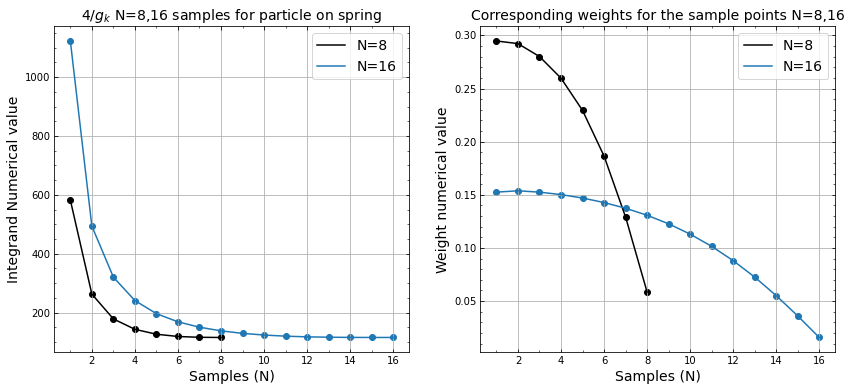

In [4]:
integrand1 = 4*f(x1)
integrand2 = 4*f(x2)
weighted_vals1 = 4*w1*f(x1)
weighted_vals2 = 4*w2*f(x2)
dom1 = np.linspace(1,8,8)
dom2 = np.linspace(1,16,16)

tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 14

fig, (ax0,ax1) = plt.subplots(figsize=(14,6),ncols=2,nrows=1)

ax0.plot(dom1,integrand1,color='k',label='N=8')
ax0.plot(dom2,integrand2,label='N=16')
ax0.scatter(dom1,integrand1,color='k')
ax0.scatter(dom2,integrand2)
ax0.set_title(r'4/$g_k$ N=8,16 samples for particle on spring',fontsize=text)
ax0.set_xlabel('Samples (N)',fontsize=text)
ax0.set_ylabel('Integrand Numerical value',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(50))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.legend(fontsize=text)
ax0.grid()

ax1.plot(dom1,weighted_vals1,color='k',label='N=8')
ax1.plot(dom2,weighted_vals2,label='N=16')
ax1.scatter(dom1,weighted_vals1,color='k')
ax1.scatter(dom2,weighted_vals2)
ax1.set_title('Corresponding weights for the sample points N=8,16',fontsize=text)
ax1.set_xlabel('Samples (N)',fontsize=text)
ax1.set_ylabel('Weight numerical value',fontsize=text)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.legend(fontsize=text)
ax1.grid()

plt.savefig('N=8,16_samples.pdf')
plt.show()

# as upper limit of integration is approached the integrand approaches approx. 75 on the left plot. on the right we have that
# as the samples get large, the weights drop off. as the samples increase the relevance of the more and more samples of N drops
# probably meaning the accuracy of the solution for this particular function does not change much

#### Part (d)

The period using N=200 sample points is 1.81025365200371
The fractional error for N=200 sample points is 0.0019548536075292893


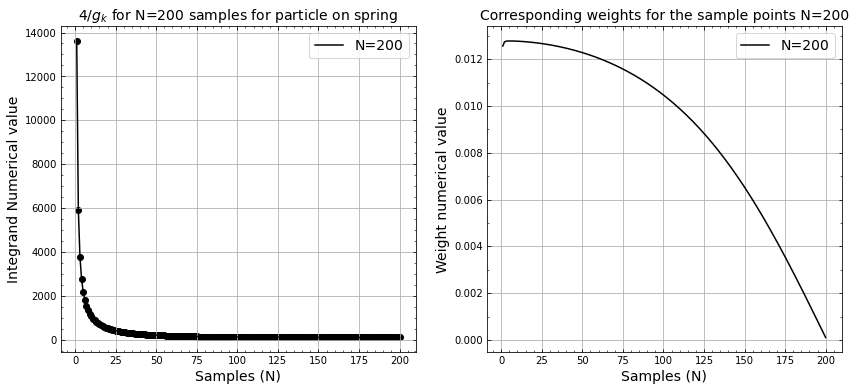

In [5]:
N3 = 200 # number of sample points
x3, w3 = gaussxwab(N3,0,x0) # finding x_i and the weights for N=200
integrand3 = 4*f(x3) # integrand for plotting
weighted_vals3 = 4*w3*f(x3)
dom3 = np.linspace(1,N3,N3)
I3 = 0
# loop over sample points to compute integral
for n in range(N3):
    I3 += w3[n]*f(x3[n])
# print
print('The period using N=200 sample points is',4*I3)
frac_err3 = abs(4*I3-T_classical)/T_classical
print('The fractional error for N=200 sample points is',frac_err3)

fig, (ax0,ax1) = plt.subplots(figsize=(14,6),ncols=2,nrows=1)

ax0.plot(dom3,integrand3,color='k',label='N=200')
ax0.scatter(dom3,integrand3,color='k')
ax0.set_title(r'4/$g_k$ for N=200 samples for particle on spring',fontsize=text)
ax0.set_xlabel('Samples (N)',fontsize=text)
ax0.set_ylabel('Integrand Numerical value',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(5))
ax0.yaxis.set_minor_locator(MultipleLocator(500))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.legend(fontsize=text)
ax0.grid()

ax1.plot(dom3,weighted_vals3,color='k',label='N=200')
ax1.set_title('Corresponding weights for the sample points N=200',fontsize=text)
ax1.set_xlabel('Samples (N)',fontsize=text)
ax1.set_ylabel('Weight numerical value',fontsize=text)
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.001))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.legend(fontsize=text)
ax1.grid()

plt.savefig('N=200_samples.pdf')
plt.show()

#### Part (e)

The fractional error is 0.023753384658487007


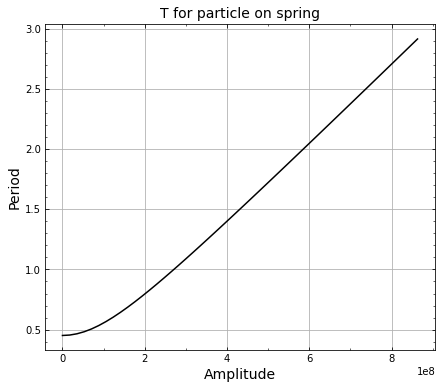

In [19]:
# Define function where you can change x0
def f(x,x0):
    """funky function to call gaussxwab on. Eq. 6"""
    m = 1 # kg, mass of the particle on the string
    k = 12 # N/m, spring constant k for the spring
    c = 2.99e8 # m/s, speed of light
    
    num = (k*(x0**2 - x**2))*(2*m*c**2 + (k/2)*(x0**2 - x**2))
    denom = 2*(m*c**2 + (k/2)*(x0**2 - x**2))**2
    func = (1/c)*(num/denom)**(-1/2)
    return(func)

N4 = 100
m = 1 
k = 12
xc = c*np.sqrt(m/k)
x0array = np.linspace(1,10*xc,50)
x4,w4 = gaussxw(N4)
Period = []
for x0i in x0array:
    # We adjust x and w for new domain
    xn = 0.5*x0i*x4 + 0.5*x0i
    wn = 0.5*x0i*w4
    tmp = 0
    for k in range(N4):
        tmp += wn[k]*f(xn[k],x0i)
    Period.append(tmp)

frac_err4 = abs(4*I4-T_classical)/T_classical
print('The fractional error is',frac_err4)

fig, ax0 = plt.subplots(figsize=(7,6),ncols=1,nrows=1)

ax0.plot(x0array,Period,color='k')
ax0.set_title('T for particle on spring',fontsize=text)
ax0.set_xlabel('Amplitude',fontsize=text)
ax0.set_ylabel('Period',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(1e8))
ax0.yaxis.set_minor_locator(MultipleLocator(0.1))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.grid()

plt.savefig('T_relative.pdf')
plt.show()